
# <div style="text-align:center">2022년 봄학기 프로그래밍3 - 12주차 <br/><인덱스 정렬></div>

<div style="text-align: right"> <b>강남대학교 인공지능융합공학부 데이터사이언스전공 곽찬희</b></div>
<div style="text-align: right"> <b>chk at kangnam dot ac dot kr</b></div>

---
### 공지사항
- 향후 수업 진행 일정
    - 10주차(5/10): 데이터 재구성 및 pandas 객체 병합
    - 11주차: 시계열 분석
    - **오늘!12주차: 인덱스 정렬 / 과제 진행**
    - 13주차: 디버깅 및 테스트 / 과제 진행 및 중간 보고 제출(github 링크)
    - 14주차: 발표 - github 를 이용한 10분 발표 / (동영상 제출 마감)
    - 15주차: 기말고사 및 학기 종료 (기말고사 형태는 추후 공지)
- 발표순서는 확정해서 알려드리겠습니다 (아마 학번순)

    
<br/>
    
    
- 주제는 어떻게 잡아요?    
    - 내가 평소에 관심 있던 데이터
    - 현재 공모전이 진행 중인 데이터 (단, 조심할 것)
    
---
    

In [1]:
import pandas as pd
import numpy as np

In [118]:
college = pd.read_csv('data/college.csv')
cols = college.columns
cols 

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [5]:
#numpy 형태로 컬럼들의 값만 추출하기 위해 values 를 사용합니다.
cols.values

array(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY',
       'RELAFFIL', 'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF',
       'CURROPER', 'PCTPELL', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10',
       'GRAD_DEBT_MDN_SUPP'], dtype=object)

In [122]:
# 인덱스도 슬라이싱이 되므로 아래와 같은 값 접근이 가능합니다.

#cols[5]
#cols[[1, 5, 6]]
cols[1::4]

Index(['CITY', 'WOMENONLY', 'DISTANCEONLY', 'UGDS_HISP', 'UGDS_2MOR',
       'CURROPER', 'MD_EARN_WNE_P10'],
      dtype='object')

In [129]:
cols.sort_values()

Index(['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU',
       'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL',
       'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV',
       'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE',
       'WOMENONLY'],
      dtype='object')

In [125]:
# index 는 Series 의 메서드를 대부분 사용할 수 있습니다.


print(cols.min(), cols.max(), cols.hasnans)

CITY WOMENONLY False


In [130]:
# 컬럼 이름에 변화를 주고 싶을 때 아래와 같이도 가능합니다.

cols[1:5] + '_new'

Index(['CITY_new', 'STABBR_new', 'HBCU_new', 'MENONLY_new'], dtype='object')

In [14]:
# string 간 비교 연산도 가능합니다.

cols > 'G'

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [132]:
# 컬럼값을 직접 바꾸는 것은 불가능합니다.
# index 가 immutable object 이기 때문입니다.
cols[1] = 'CITY1'

TypeError: Index does not support mutable operations

In [133]:
# 집합의 개념을 사용할 수도 있습니다.

c1 = cols[:4] # 0 1 2 3 
c2 = cols[2:6] # 2 3 4 5

In [134]:
c1

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU'], dtype='object')

In [135]:
c2

Index(['STABBR', 'HBCU', 'MENONLY', 'WOMENONLY'], dtype='object')

In [136]:
c1+c2

Index(['INSTNMSTABBR', 'CITYHBCU', 'STABBRMENONLY', 'HBCUWOMENONLY'], dtype='object')

In [139]:
c1.union(c2)
# c1 | c2

Index(['CITY', 'HBCU', 'INSTNM', 'MENONLY', 'STABBR', 'WOMENONLY'], dtype='object')

In [140]:
c1.intersection(c2)

Index(['STABBR', 'HBCU'], dtype='object')

In [141]:
c1.difference(c2)

Index(['CITY', 'INSTNM'], dtype='object')

---
카티션 곱 (cartesian product)
A = ['a', 'b']
B = ['c', 'd']

일 때 카티션 곱 A X B = ('ac', 'ad', 'bc', 'bd') 가 됩니다.

그러니까, 모든 경우의 수를 나타내는 것이지요.

시리즈의 계산을 진행할 때, 인덱스를 맞춰주지 않으면 기본적으로 카티션 곱을 수행합니다.

아래 코드를 봅시다.

In [142]:
s1 = pd.Series(index=list('aaab'), data=np.arange(4))
s2 = pd.Series(index=list('cababb'), data=np.arange(6))

In [143]:
s1

a    0
a    1
a    2
b    3
dtype: int32

In [23]:
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int32

In [21]:
s1 + s2 

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

dtype 이 변경된 것은 c 가 s1에서는 존재하지 않기 때문입니다.

그러니까 NaN + 0 = NaN이 된 것이죠.


만약 양쪽의 인덱스가 동일하다면, 카티션 곱이 아닌 순서대로 계산됩니다.

In [144]:
s1 = pd.Series(index=list('aaabb'), data=np.arange(5))
s2 = pd.Series(index=list('aaabb'), data=np.arange(5))

In [145]:
s1 + s2

a    0
a    2
a    4
b    6
b    8
dtype: int32

In [152]:
#그런데 순서가 다르면 다시 카티션 곱이 생겨요.
s1 = pd.Series(index=list('aaabb'), data=np.arange(5))
s2 = pd.Series(index=list('bbaaa'), data=np.arange(5)).sort_index()

In [153]:
s1+s2

a    2
a    4
a    6
b    3
b    5
dtype: int32

In [154]:
#마지막으로 인덱스의 순서는 다르지만 중복되지 않는 동일한 인덱스인 경우, 카티션 곱을 생성하지 않습니다.

s1 = pd.Series(index=list('ab'), data=np.arange(2))
s2 = pd.Series(index=list('ba'), data=np.arange(2))

s1+s2


a    1
b    1
dtype: int32

그러니까 여러 컬럼을 조작할 때, 인덱스가 같은지 확인하는 것이 중요하겠죠?

만약 이런 사항을 고려하지 않으면 인덱스가 무진장! 많아지는 현상을 볼 수 있습니다.

아래와 같이 말이죠.

In [155]:
emp = pd.read_csv('data/employee.csv', index_col='RACE')
emp.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
RACE,,,,,,,,,
Hispanic/Latino,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Full Time,Female,Active,2006-06-12,2012-10-13
Hispanic/Latino,1,LIBRARY ASSISTANT,Library,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18
White,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03
White,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,Full Time,Male,Active,1982-02-08,1991-05-25
White,4,ELECTRICIAN,General Services Department,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22


In [156]:
# BASE_SALARY 의 컬럼을 선택한 뒤 두 객체가 같은지 봅시다.
salary1 = emp['BASE_SALARY']
salary2 = emp['BASE_SALARY']

salary1 is salary2

True

In [157]:
# 얕은 복사가 되니 같은 것을 가리키겠죠?
# 깊은 복사를 하기 위해 .copy 를 사용합니다.

salary2 = emp['BASE_SALARY'].copy()
salary1 is salary2

False

In [158]:
print(id(salary2), id(salary1), id(emp['BASE_SALARY']))

2309151238608 2309168747520 2309168747520


In [159]:
# 정렬을 한 뒤, 두 시리즈를 더해봅시다.
# 두 시리즈가 가진 내용은 같지만, 인덱스 정렬 상태만 다른 걸 기억합시다.
salary1 = salary1.sort_index()


In [163]:
salary1

RACE
American Indian or Alaskan Native    78355.0
American Indian or Alaskan Native    26125.0
American Indian or Alaskan Native    98536.0
American Indian or Alaskan Native        NaN
American Indian or Alaskan Native    55461.0
                                      ...   
NaN                                  40000.0
NaN                                  28024.0
NaN                                  28766.0
NaN                                      NaN
NaN                                  28024.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [164]:
#Length 를 잘 보세요.
#salary1 의 길이는 2000 입니다.

salary1 + salary2

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
                                       ...   
NaN                                   68024.0
NaN                                   56048.0
NaN                                   56790.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 1175424, dtype: float64

In [165]:
# 위와 비교해봅시다.

salary1 + salary1

RACE
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native     52250.0
American Indian or Alaskan Native    197072.0
American Indian or Alaskan Native         NaN
American Indian or Alaskan Native    110922.0
                                       ...   
NaN                                   80000.0
NaN                                   56048.0
NaN                                   57532.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [166]:
salary1 + salary2.sort_index()

RACE
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native     52250.0
American Indian or Alaskan Native    197072.0
American Indian or Alaskan Native         NaN
American Indian or Alaskan Native    110922.0
                                       ...   
NaN                                   80000.0
NaN                                   56048.0
NaN                                   57532.0
NaN                                       NaN
NaN                                   56048.0
Name: BASE_SALARY, Length: 2000, dtype: float64

---

다른 인덱스를 가진 값들을 더하는 방법에 대해 좀 더 다뤄봅시다.

여기서는 baseball 데이터를 사용합니다.

In [167]:
baseball_14 = pd.read_csv('data/baseball14.csv', index_col='playerID')
baseball_15 = pd.read_csv('data/baseball15.csv', index_col='playerID')
baseball_16 = pd.read_csv('data/baseball16.csv', index_col='playerID')

In [173]:
baseball_14

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
altuvjo01,2014,1,HOU,AL,158,660,85,225,47,3,...,59.0,56.0,9.0,36,53.0,7.0,5.0,1.0,5.0,20.0
cartech02,2014,1,HOU,AL,145,507,68,115,21,1,...,88.0,5.0,2.0,56,182.0,6.0,5.0,0.0,4.0,12.0
castrja01,2014,1,HOU,AL,126,465,43,103,21,2,...,56.0,1.0,0.0,34,151.0,1.0,9.0,1.0,3.0,11.0
corpoca01,2014,1,HOU,AL,55,170,22,40,6,0,...,19.0,0.0,0.0,14,37.0,0.0,3.0,1.0,2.0,3.0
dominma01,2014,1,HOU,AL,157,564,51,121,17,0,...,57.0,0.0,1.0,29,125.0,2.0,5.0,2.0,7.0,23.0
fowlede01,2014,1,HOU,AL,116,434,61,120,21,4,...,35.0,11.0,4.0,66,108.0,2.0,3.0,1.0,1.0,6.0
gonzama01,2014,1,HOU,AL,103,285,33,79,15,1,...,23.0,2.0,4.0,17,58.0,0.0,4.0,4.0,0.0,6.0
grossro01,2014,1,HOU,AL,103,360,42,84,14,2,...,37.0,9.0,3.0,55,105.0,1.0,2.0,3.0,2.0,7.0
guzmaje01,2014,1,HOU,AL,69,165,10,31,4,0,...,9.0,3.0,0.0,19,52.0,0.0,0.0,0.0,0.0,4.0


In [175]:
baseball_15.index

Index(['altuvjo01', 'cartech02', 'castrja01', 'congeha01', 'correca01',
       'gattiev01', 'gomezca01', 'gonzama01', 'lowrije01', 'marisja01',
       'rasmuco01', 'springe01', 'tuckepr01', 'valbulu01', 'villajo01'],
      dtype='object', name='playerID')

In [176]:
# 두 파일이 같은 인덱스를 가지고 있는지 확인하기 위해 difference 를 써봅시다.
# 여기서 인덱스는 playerID, 즉 선수의 고유 번호입니다. (위 read_csv 참고)
# difference 는 차집합을 구할 때 사용합니다.

baseball_14.index.difference(baseball_15.index)

Index(['corpoca01', 'dominma01', 'fowlede01', 'grossro01', 'guzmaje01',
       'hoeslj01', 'krausma01', 'preslal01', 'singljo02'],
      dtype='object', name='playerID')

In [177]:
#그러니까, 14년에 뛰었는데 15년엔 뛰지 않았거나, 그 반대의 경우가 있는 것이죠.
# 반대 경우도 확인합니다.
baseball_15.index.difference(baseball_14.index)

Index(['congeha01', 'correca01', 'gattiev01', 'gomezca01', 'lowrije01',
       'rasmuco01', 'tuckepr01', 'valbulu01'],
      dtype='object', name='playerID')

In [178]:
#각 인덱스에 고유한 선수가 있네요. 
# 이 선수들의 안타를 확인합시다.

hits_14 = baseball_14['H']
hits_15 = baseball_15['H']
hits_16 = baseball_16['H']

hits_14.head()

playerID
altuvjo01    225
cartech02    115
castrja01    103
corpoca01     40
dominma01    121
Name: H, dtype: int64

In [180]:
# 두 년도를 더해봅시다.

(hits_14 + hits_15).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01      NaN
corpoca01      NaN
Name: H, dtype: float64

In [181]:
# 여기서는 두 해에 걸친 안타 기록이 되겠네요.
# 그런데 인덱스가 존재하지 않는 경우 결측치가 되어 NaN이 됩니다.
# add 와 fill_value 를 사용해서 0을 채운 뒤 값을 봅시다.

hits_total = hits_14.add(hits_15, fill_value=0).add(hits_16, fill_value=0)

In [ ]:
hits_total

In [183]:
#인덱스의 차이가 아닌, 원래부터 Na값이 들어있는 경우엔, fill_value 와 관계 없이 결측치가 됩니다.

s = pd.Series(index=list('abcd'), data=[np.nan, 3, np.nan, 1])
s1 = pd.Series(index=list('abc'), data=[np.nan, 6, 10])


In [184]:
s

a    NaN
b    3.0
c    NaN
d    1.0
dtype: float64

In [185]:
s1

a     NaN
b     6.0
c    10.0
dtype: float64

In [186]:
s.add(s1, fill_value=5)

a     NaN
b     9.0
c    15.0
d     6.0
dtype: float64

---
Series 의 덧셈에서 나아가, DF의 덧셈도 인덱스를 맞춰 진행할 수 있습니다.

다만, 카티션 곱!을 조심해야햅니다.

In [57]:
df_14 = baseball_14[['G', 'AB', 'R', 'H']]
df_15 = baseball_15[['AB', 'R', 'H', 'HR']] #일부러 다르게 선택해봅시다.

In [189]:
#당연히 난리가 나겠죠?
(df_14 + df_15).head(10)

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298.0,NaN,425.0,NaN,171.0
cartech02,898.0,NaN,193.0,NaN,118.0
castrja01,802.0,NaN,174.0,NaN,81.0
congeha01,NaN,NaN,NaN,NaN,NaN
corpoca01,NaN,NaN,NaN,NaN,NaN
correca01,NaN,NaN,NaN,NaN,NaN
dominma01,NaN,NaN,NaN,NaN,NaN
fowlede01,NaN,NaN,NaN,NaN,NaN
gattiev01,NaN,NaN,NaN,NaN,NaN


In [191]:
#add 를 쓰면 좀 나아지겠지만, 문제를 해결해주진 못합니다.
# 14/15년 중 한 해에만 기록이 있으면 문제가 되는 것이겠죠.

(
    df_14.add(df_15, fill_value=0)
    .head(10)
    .style.highlight_null('yellow') # 이렇게 쓰면 최종 결과에서 null 값을 더 잘 보여줍니다.
)

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298.000000,158.000000,425.000000,15.000000,171.000000
cartech02,898.000000,145.000000,193.000000,24.000000,118.000000
castrja01,802.000000,126.000000,174.000000,11.000000,81.000000
congeha01,201.000000,nan,46.000000,11.000000,25.000000
corpoca01,170.000000,55.000000,40.000000,nan,22.000000
correca01,387.000000,nan,108.000000,22.000000,52.000000
dominma01,564.000000,157.000000,121.000000,nan,51.000000
fowlede01,434.000000,116.000000,120.000000,nan,61.000000
gattiev01,566.000000,nan,139.000000,27.000000,66.000000


---

DF에 새 열을 추가할 때엔, 인덱스가 먼저 정렬이 됩니다.
여기선  SALARY에 대한 정보를 추가해봅시다.

In [192]:
dept_sal = emp[['DEPARTMENT', 'BASE_SALARY']]
#부서별, 급여별 정렬
dept_sal = dept_sal.sort_values(['DEPARTMENT', 'BASE_SALARY'], 
                               ascending=[True, False])

In [195]:
max_dept_sal = dept_sal.drop_duplicates(subset='DEPARTMENT')
max_dept_sal.head()

,DEPARTMENT,BASE_SALARY
RACE,,
White,Admn. & Regulatory Affairs,140416.0
Hispanic/Latino,City Controller's Office,64251.0
Black or African American,City Council,100000.0
Hispanic/Latino,Convention and Entertainment,38397.0
Black or African American,Dept of Neighborhoods (DON),89221.0


In [198]:
max_dept_sal.shape

(24, 1)

In [196]:
# 위 정보를 합치기위해, 두 DF의 인덱스를 맞춰줍니다.
max_dept_sal = max_dept_sal.set_index('DEPARTMENT')
emp = emp.set_index('DEPARTMENT')



In [199]:
max_dept_sal

,BASE_SALARY
DEPARTMENT,
Admn. & Regulatory Affairs,140416.0
City Controller's Office,64251.0
City Council,100000.0
Convention and Entertainment,38397.0
Dept of Neighborhoods (DON),89221.0
Finance,96272.0
Fleet Management Department,125884.0
General Services Department,89194.0
Health & Human Services,180416.0


In [197]:
emp

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
DEPARTMENT,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Full Time,Female,Active,2006-06-12,2012-10-13
Library,1,LIBRARY ASSISTANT,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,Full Time,Male,Active,1982-02-08,1991-05-25
General Services Department,4,ELECTRICIAN,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...
Houston Police Department-HPD,1995,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-06-09,2015-06-09
Houston Fire Department (HFD),1996,COMMUNICATIONS CAPTAIN,66523.0,Full Time,Male,Active,2003-09-02,2013-10-06
Houston Police Department-HPD,1997,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-10-13,2015-10-13


In [200]:
emp = emp.assign(MAX_DEPT_SALARY=max_dept_sal['BASE_SALARY'])

In [201]:
emp

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
Library,1,LIBRARY ASSISTANT,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
General Services Department,4,ELECTRICIAN,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...
Houston Police Department-HPD,1995,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
Houston Fire Department (HFD),1996,COMMUNICATIONS CAPTAIN,66523.0,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
Houston Police Department-HPD,1997,POLICE OFFICER,43443.0,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0


위의 작업을 차근차근 정리해봅시다.

emp 에서 부서별 최고 급여를 찾은 뒤, 자신의 부서에서 가장 높은 급여를 컬럼으로 포함시킨 것이죠.

이것은 department 가 겹치지 않았기 때문에 가능한데, 만약 겹치는(중복된) 부서 이름이 등장하면 카티션 곱이 생성되었을 겁니다.


그런데 이렇게 긴~코드를 작성하는 것은 귀찮으니까, 우리는 간단한 아래의 코드를 봅시다.

In [202]:
emp = pd.read_csv('data/employee.csv')
max_sal = (
    emp
    .groupby('DEPARTMENT')
    .BASE_SALARY
    .transform('max') 
)

In [203]:
max_sal

0       121862.0
1       107763.0
2       199596.0
3       210588.0
4        89194.0
          ...   
1995    199596.0
1996    210588.0
1997    199596.0
1998    199596.0
1999    210588.0
Name: BASE_SALARY, Length: 2000, dtype: float64

In [204]:
#transform 의 결과는 index 를 유지하기때문에 바로 넣을 수가 있습니다.
emp.assign(max_sal = max_sal) 

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,max_sal
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,199596.0


In [205]:
max_sal = (
    emp
    .groupby('DEPARTMENT')
    .BASE_SALARY
    .max() 
) 

In [206]:
max_sal

DEPARTMENT
Admn. & Regulatory Affairs        140416.0
City Controller's Office           64251.0
City Council                      100000.0
Convention and Entertainment       38397.0
Dept of Neighborhoods (DON)        89221.0
Finance                            96272.0
Fleet Management Department       125884.0
General Services Department        89194.0
Health & Human Services           180416.0
Housing and Community Devp.        98536.0
Houston Airport System (HAS)      186192.0
Houston Emergency Center (HEC)     84456.0
Houston Fire Department (HFD)     210588.0
Houston Information Tech Svcs     102019.0
Houston Police Department-HPD     199596.0
Human Resources Dept.             110547.0
Legal Department                  275000.0
Library                           107763.0
Mayor's Office                    120750.0
Municipal Courts Department       121862.0
Parks & Recreation                 85055.0
Planning & Development             68762.0
Public Works & Engineering-PWE    178331.0


In [209]:
# 위의 결과와 비교해보세요.
# transform 이 아닌, max 를 썼더니!
emp.assign(max_sal = max_sal)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,max_sal
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,NaN
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,NaN
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,NaN
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,NaN
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,NaN
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,NaN
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,NaN
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,NaN


In [210]:
#이럴 때 생각나는 것이, Database 시간에 배운 join 이죠?
#pandas 에서는 merge 로 비슷한 일을 할 수 있습니다.

(
    emp.merge(max_sal.rename('MAX_DEPT_SALARY'),
        how='left',
        left_on='DEPARTMENT',
        right_index=True       
    )
)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,199596.0
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,210588.0
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,199596.0
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02,199596.0


---

이번에는 스타일 변경을 통해 각 열의 최대값을 강조해봅시다.



In [211]:

college = pd.read_csv('data/college.csv', index_col='INSTNM')

In [212]:
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                int64
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

In [84]:
# 여기서 MD_EARN_WNE_P10 과 GRAD_DEBT_MDN_SUPP 는 사실 수치형 변수입니다.
# 왜 object 로 되어있는지 알아봅시다.

college.MD_EARN_WNE_P10.value_counts().head()

PrivacySuppressed    822
38800                151
21500                 97
49200                 78
27400                 46
Name: MD_EARN_WNE_P10, dtype: int64

In [86]:
college.GRAD_DEBT_MDN_SUPP.value_counts().head()


PrivacySuppressed    1510
9500                  514
27000                 306
25827.5               136
25000                 124
Name: GRAD_DEBT_MDN_SUPP, dtype: int64

In [216]:
pd.to_numeric(pd.Series(data=['1','2','3','a']), errors='coerce')

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [217]:
# privacy 때문에 지워진(가려진)데이터들이 문자형으로 들어있어 object 로 되어 있네요.
# pandas 에서는 to_numeric 을 통해 수치형 변수로 변경할 수 있는데, 이 때 errors='coerce'로 해주면
# 수치형이 아닌 값을 NaN으로 만들어줍니다.

cols = ['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']

for col in cols:
    college[col] = pd.to_numeric(
        college[col], errors='coerce'
    )
    

college.loc[:, cols].dtypes

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

<AxesSubplot:>

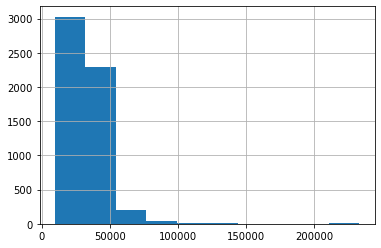

In [224]:
college.loc[:, cols[0]].hist()

In [225]:
# select_dtypes 를 이용해 수치열만 봅시다.

college_n = college.select_dtypes('number')
college_n.head()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600.0,33118.5


In [226]:
# 이 중에서 binary (0/1로 값이 구성된 것)을 찾아서 빼줍시다.

is_binary = college_n.nunique() == 2
is_binary.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

In [227]:
is_binary.sum()

6

In [228]:
binary_cols = college_n.columns[is_binary]

In [229]:
binary_cols

Index(['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER'], dtype='object')

In [239]:
# 이제 binary_cols 만 빼고! 선택합시다.
college_n2 = college_n.loc[:, ~is_binary]
# 이렇게 해도 됩니다.
# college_n.drop(columns=binary_cols)

In [240]:
college_n2

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,0.7347,0.7554,0.1270,26600.0,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21163.0
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6333.0


In [241]:
#idxmax 는 최대값이 되는 index 를 찾아서 알려줍니다.
#매우 유용하니 잘 기억해두세요!!!!!!!
#idxmin (index max약자임) 도 있어요

max_cols = college_n2.idxmax()

In [242]:
max_cols

SATVRMID                             California Institute of Technology
SATMTMID                             California Institute of Technology
UGDS                                      University of Phoenix-Arizona
UGDS_WHITE                       Mr Leon's School of Hair Design-Moscow
UGDS_BLACK                           Velvatex College of Beauty Culture
UGDS_HISP                       Thunderbird School of Global Management
UGDS_ASIAN                          Cosmopolitan Beauty and Tech School
UGDS_AIAN                             Haskell Indian Nations University
UGDS_NHPI                                       Palau Community College
UGDS_2MOR                                                 LIU Brentwood
UGDS_NRA               California University of Management and Sciences
UGDS_UNKN             Le Cordon Bleu College of Culinary Arts-San Fr...
PPTUG_EF                        Thunderbird School of Global Management
PCTPELL                                        MTI Business Coll

In [244]:
# 최대값을 가진 학교만 추려봅시다

unique_max_cols = max_cols.unique()
unique_max_cols

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management',
       'Cosmopolitan Beauty and Tech School',
       'Haskell Indian Nations University', 'Palau Community College',
       'LIU Brentwood',
       'California University of Management and Sciences',
       'Le Cordon Bleu College of Culinary Arts-San Francisco',
       'MTI Business College Inc', 'ABC Beauty College Inc',
       'Dongguk University-Los Angeles', 'Medical College of Wisconsin',
       'Southwest University of Visual Arts-Tucson'], dtype=object)

In [251]:
#위에서 얻은 결과만 출력

college_n2.loc[unique_max_cols].style.highlight_max(axis='index')

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
California Institute of Technology,765.000000,785.000000,983.000000,0.278700,0.015300,0.122100,0.438500,0.001000,0.000000,0.057000,0.087500,0.000000,0.000000,0.112600,0.230300,0.008200,77800.000000,11812.500000
University of Phoenix-Arizona,nan,nan,151558.000000,0.309800,0.155500,0.076000,0.008200,0.004200,0.005000,0.113100,0.013100,0.315200,0.000000,0.600900,0.592000,nan,nan,33000.000000
Mr Leon's School of Hair Design-Moscow,nan,nan,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.625000,0.200000,nan,15710.000000
Velvatex College of Beauty Culture,nan,nan,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.769200,0.000000,0.520000,nan,nan
Thunderbird School of Global Management,nan,nan,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,118900.000000,nan
Cosmopolitan Beauty and Tech School,nan,nan,110.000000,0.009100,0.000000,0.018200,0.972700,0.000000,0.000000,0.000000,0.000000,0.000000,0.318200,0.776100,0.124400,0.954500,nan,nan
Haskell Indian Nations University,430.000000,440.000000,805.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.022400,0.839600,0.000000,0.208900,22800.000000,nan
Palau Community College,nan,nan,602.000000,0.000000,0.001700,0.000000,0.000000,0.000000,0.998300,0.000000,0.000000,0.000000,0.388700,0.856000,0.000000,0.261600,24700.000000,nan
LIU Brentwood,nan,nan,15.000000,0.000000,0.133300,0.266700,0.000000,0.000000,0.000000,0.533300,0.000000,0.066700,0.400000,0.565200,0.782600,0.782600,44600.000000,25499.000000


In [116]:
#highlight_max를 쓰면 눈에 잘 띄는 최대값을 볼 수 있습니다.
#axis 를 바꿔주면 최대값의 기준을 바꿀 수 있습니다.
college.filter(like='UGDS_').head().style.highlight_max(axis=0) 


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.033300,0.935300,0.005500,0.001900,0.002400,0.001900,0.000000,0.005900,0.013800
University of Alabama at Birmingham,0.592200,0.260000,0.028300,0.051800,0.002200,0.000700,0.036800,0.017900,0.010000
Amridge University,0.299000,0.419200,0.006900,0.003400,0.000000,0.000000,0.000000,0.000000,0.271500
University of Alabama in Huntsville,0.698800,0.125500,0.038200,0.037600,0.014300,0.000200,0.017200,0.033200,0.035000
Alabama State University,0.015800,0.920800,0.012100,0.001900,0.001000,0.000600,0.009800,0.024300,0.013700
